# Make the imports
set the importations 

In [50]:
## imports
import warnings 
warnings.filterwarnings('ignore')

import skillsnetwork
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder

# Load the data

Read the data and show the head

In [51]:
## Load the data of rendimientoAcademico
URL = 'http://upcedupe-my.sharepoint.com/:x:/g/personal/e201210223_upc_edu_pe/ETKYqjlGxDtAv7JIexnP0VkBOnvsLBR9ip6KNaVQsvUflg?e=Z3QbqW'

await skillsnetwork.download_dataset(URL)
academic = pd.read_csv('rendimientoAcademico.csv', sep=';')

academic.head(5)

Saved as 'ETKYqjlGxDtAv7JIexnP0VkBOnvsLBR9ip6KNaVQsvUflg'


,gender,age,civilStatus,childrens,district,health,closeFriends,work,workHoursWeek,familyMembers,...,universitySelectionReazon,minToTravel,weekStudyTime,failCourses,AsistancePercentage,midterExam,finalExam,practiceGrade,FinalGrade,StudentPerformance
0,Hombre,19,Sin Pareja,0,Lima Norte,Regular,3,No,4,3,...,Cercania,15.0,2.0,1,90,14,12,13.0,13.000000,Low
1,Hombre,22,Sin Pareja,0,Lima Norte,Bien,2,No,0,3,...,Preferida,30.0,8.0,0,100,16,17,16.0,16.333333,Medium
2,Mujer,24,Sin Pareja,0,Callao,Mal,5,Si,48,4,...,Preferida,45.0,0.0,0,80,15,15,16.0,15.333333,Medium
3,Hombre,19,Sin Pareja,0,Lima Cercado,Bien,30,Si,40,25,...,Cercania,20.0,3.0,0,100,15,15,14.0,14.666667,Medium
4,Hombre,20,Sin Pareja,0,Lima Norte,Bien,4,Si,25,5,...,Preferida,50.0,5.0,2,100,14,14,14.0,14.000000,Medium


# Cleanning and feature ingeeniering
lets see more info about the dataset

In [52]:
academic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     327 non-null    object 
 1   age                        327 non-null    int64  
 2   civilStatus                327 non-null    object 
 3   childrens                  327 non-null    int64  
 4   district                   327 non-null    object 
 5   health                     327 non-null    object 
 6   closeFriends               327 non-null    int64  
 7   work                       327 non-null    object 
 8   workHoursWeek              327 non-null    int64  
 9   familyMembers              327 non-null    int64  
 10  familiarIncome             327 non-null    object 
 11  fatherStudy                327 non-null    object 
 12  motherStudy                327 non-null    object 
 13  university                 327 non-null    object 

the dataset has severals columns, some of then are objects so they shoud be transform in categorial ones.
the next code is to see if there are null values apparently by the info above there is not but lets check again.

Text(0.5, 1.0, 'Total Missing Values')

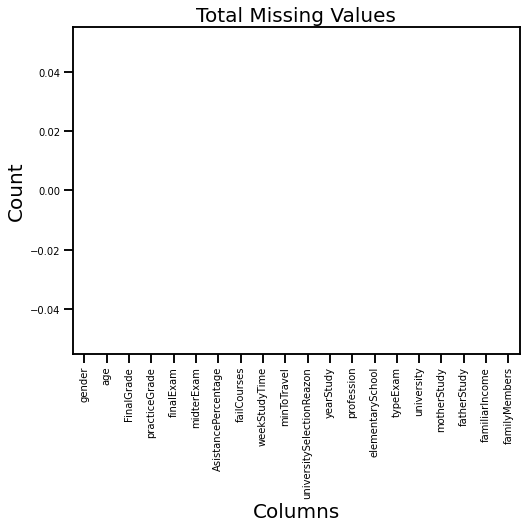

In [53]:
total = academic.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

The plot shows that there is no missing values to validate

many columns are strings needs to be convert into categorical numerical values

In [54]:
df_uniques = pd.DataFrame([[i, len(academic[i].unique())] for i in academic.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
gender,2
age,39
civilStatus,2
childrens,4
district,4
health,3
closeFriends,19
work,2
workHoursWeek,40


In [55]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['gender',
 'civilStatus',
 'work',
 'fatherStudy',
 'motherStudy',
 'university',
 'typeExam',
 'elementarySchool']

In [56]:
[[i, list(academic[i].unique())] for i in binary_variables]

[['gender', ['Hombre', 'Mujer']],
 ['civilStatus', ['Sin Pareja', 'Con Pareja']],
 ['work', ['No', 'Si']],
 ['fatherStudy', ['Profesional', 'No Profesional']],
 ['motherStudy', ['Profesional', 'No Profesional']],
 ['university', ['Particular', 'Nacional']],
 ['typeExam', ['Examen ordinario', 'Examen Especial']],
 ['elementarySchool', ['Particular', 'Nacional']]]

In [57]:
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['childrens',
 'district',
 'health',
 'familiarIncome',
 'profession',
 'yearStudy',
 'universitySelectionReazon',
 'StudentPerformance']

In [58]:
[[i, list(academic[i].unique())] for i in categorical_variables]

[['childrens', [0, 1, 2, 3]],
 ['district', ['Lima Norte', 'Callao', 'Lima Cercado', 'Lima Sur']],
 ['health', ['Regular', 'Bien', 'Mal']],
 ['familiarIncome', ['Medio', 'Bajo', 'Alto']],
 ['profession', ['Ingenieria', 'Letras', 'Administracion', 'ADMINISTRACION']],
 ['yearStudy', [2, 3, 5, 4, 1]],
 ['universitySelectionReazon',
  ['Cercania', 'Preferida', 'Costos', 'Beneficios']],
 ['StudentPerformance', ['Low', 'Medium', 'High']]]

In [59]:
ordinal_variables = ['district', 'health','familiarIncome','profession','universitySelectionReazon','StudentPerformance']

In [60]:
numeric_variables = list(set(academic.columns) - set(ordinal_variables)  - set(binary_variables))
numeric_variables

['age',
 'familyMembers',
 'yearStudy',
 'minToTravel',
 'midterExam',
 'finalExam',
 'closeFriends',
 'AsistancePercentage',
 'FinalGrade',
 'practiceGrade',
 'weekStudyTime',
 'workHoursWeek',
 'childrens',
 'failCourses']

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'familyMembers'}>,
        <AxesSubplot:title={'center':'yearStudy'}>,
        <AxesSubplot:title={'center':'minToTravel'}>],
       [<AxesSubplot:title={'center':'midterExam'}>,
        <AxesSubplot:title={'center':'finalExam'}>,
        <AxesSubplot:title={'center':'closeFriends'}>,
        <AxesSubplot:title={'center':'AsistancePercentage'}>],
       [<AxesSubplot:title={'center':'FinalGrade'}>,
        <AxesSubplot:title={'center':'practiceGrade'}>,
        <AxesSubplot:title={'center':'weekStudyTime'}>,
        <AxesSubplot:title={'center':'workHoursWeek'}>],
       [<AxesSubplot:title={'center':'childrens'}>,
        <AxesSubplot:title={'center':'failCourses'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

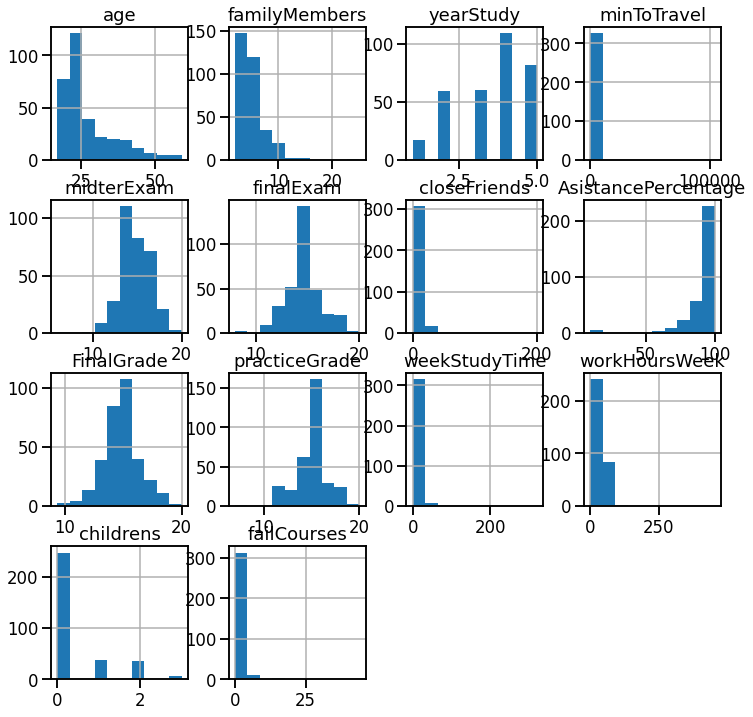

In [61]:
academic[numeric_variables].hist(figsize=(12, 12))


In [62]:
string_variables = list(set(academic.columns) - set(numeric_variables))
string_variables

['gender',
 'health',
 'university',
 'profession',
 'StudentPerformance',
 'work',
 'civilStatus',
 'familiarIncome',
 'motherStudy',
 'typeExam',
 'elementarySchool',
 'universitySelectionReazon',
 'district',
 'fatherStudy']

In [63]:
[[i, list(academic[i].unique())] for i in string_variables]

[['gender', ['Hombre', 'Mujer']],
 ['health', ['Regular', 'Bien', 'Mal']],
 ['university', ['Particular', 'Nacional']],
 ['profession', ['Ingenieria', 'Letras', 'Administracion', 'ADMINISTRACION']],
 ['StudentPerformance', ['Low', 'Medium', 'High']],
 ['work', ['No', 'Si']],
 ['civilStatus', ['Sin Pareja', 'Con Pareja']],
 ['familiarIncome', ['Medio', 'Bajo', 'Alto']],
 ['motherStudy', ['Profesional', 'No Profesional']],
 ['typeExam', ['Examen ordinario', 'Examen Especial']],
 ['elementarySchool', ['Particular', 'Nacional']],
 ['universitySelectionReazon',
  ['Cercania', 'Preferida', 'Costos', 'Beneficios']],
 ['district', ['Lima Norte', 'Callao', 'Lima Cercado', 'Lima Sur']],
 ['fatherStudy', ['Profesional', 'No Profesional']]]

In [64]:
le = LabelEncoder()
for column in string_variables:
    academic[column] = le.fit_transform(academic[column])

In [65]:
academic

,gender,age,civilStatus,childrens,district,health,closeFriends,work,workHoursWeek,familyMembers,...,universitySelectionReazon,minToTravel,weekStudyTime,failCourses,AsistancePercentage,midterExam,finalExam,practiceGrade,FinalGrade,StudentPerformance
0,0,19,1,0,2,2,3,0,4,3,...,1,15.0,2.0,1,90,14,12,13.0,13.000000,1
1,0,22,1,0,2,0,2,0,0,3,...,3,30.0,8.0,0,100,16,17,16.0,16.333333,2
2,1,24,1,0,0,1,5,1,48,4,...,3,45.0,0.0,0,80,15,15,16.0,15.333333,2
3,0,19,1,0,1,0,30,1,40,25,...,1,20.0,3.0,0,100,15,15,14.0,14.666667,2
4,0,20,1,0,2,0,4,1,25,5,...,3,50.0,5.0,2,100,14,14,14.0,14.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,32,1,0,3,0,2,1,42,3,...,3,120.0,4.0,0,98,15,16,15.0,15.333333,2
323,0,24,1,0,1,0,2,1,52,6,...,3,90.0,80.0,0,100,15,14,16.0,15.000000,2
324,0,29,1,0,2,0,25,1,48,5,...,3,25.0,5.0,0,90,17,18,17.0,17.333333,0
325,0,23,1,0,3,0,2,1,24,2,...,3,180.0,3.0,0,90,15,18,16.0,16.333333,2


In [66]:
academic.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,327.0,0.207951,0.406464,0.000000,0.000000,0.000000,0.000000,1.0
age,327.0,27.562691,8.768401,17.000000,22.000000,24.000000,31.000000,59.0
civilStatus,327.0,0.666667,0.472127,0.000000,0.000000,1.000000,1.000000,1.0
childrens,327.0,0.397554,0.768071,0.000000,0.000000,0.000000,0.000000,3.0
district,327.0,1.822630,1.029790,0.000000,1.000000,2.000000,3.000000,3.0
health,327.0,0.464832,0.831411,0.000000,0.000000,0.000000,0.000000,2.0
closeFriends,327.0,6.770642,12.504453,0.000000,3.000000,4.000000,7.000000,200.0
work,327.0,0.675841,0.468777,0.000000,0.000000,1.000000,1.000000,1.0
workHoursWeek,327.0,27.073394,32.663005,0.000000,0.000000,30.000000,48.000000,453.0
familyMembers,327.0,5.152905,2.396543,2.000000,4.000000,5.000000,6.000000,25.0


Lets see the outliners

<AxesSubplot:xlabel='weekStudyTime'>

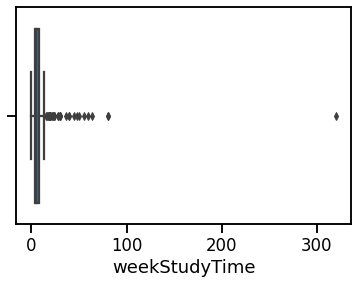

In [67]:
sns.boxplot(x=academic['weekStudyTime'])

In [68]:
academic.sort_values(by = 'weekStudyTime', ascending = False)[:2]

,gender,age,civilStatus,childrens,district,health,closeFriends,work,workHoursWeek,familyMembers,...,universitySelectionReazon,minToTravel,weekStudyTime,failCourses,AsistancePercentage,midterExam,finalExam,practiceGrade,FinalGrade,StudentPerformance
225,0,29,1,0,2,0,5,1,40,4,...,3,100.0,320.0,0,100,14,14,15.0,14.333333,2
323,0,24,1,0,1,0,2,1,52,6,...,3,90.0,80.0,0,100,15,14,16.0,15.000000,2


<AxesSubplot:xlabel='minToTravel'>

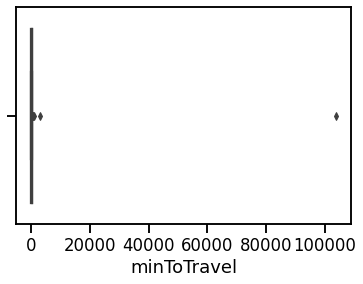

In [69]:
sns.boxplot(x=academic['minToTravel'])

In [70]:
academic.sort_values(by = 'minToTravel', ascending = False)[:2]

,gender,age,civilStatus,childrens,district,health,closeFriends,work,workHoursWeek,familyMembers,...,universitySelectionReazon,minToTravel,weekStudyTime,failCourses,AsistancePercentage,midterExam,finalExam,practiceGrade,FinalGrade,StudentPerformance
310,1,22,1,0,3,0,5,1,7,6,...,3,103845.0,8.0,4,90,13,13,15.0,13.666667,2
200,0,50,0,1,1,0,5,1,8,3,...,3,2880.0,3.0,0,100,15,15,18.0,16.000000,2


<AxesSubplot:xlabel='familyMembers'>

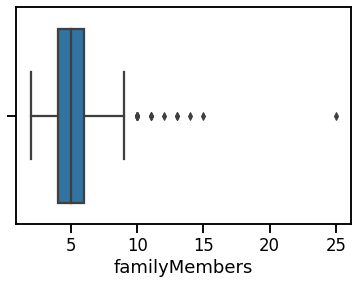

In [71]:
sns.boxplot(x=academic['familyMembers']) 

In [72]:
academic.sort_values(by = 'familyMembers', ascending = False)[:2]


,gender,age,civilStatus,childrens,district,health,closeFriends,work,workHoursWeek,familyMembers,...,universitySelectionReazon,minToTravel,weekStudyTime,failCourses,AsistancePercentage,midterExam,finalExam,practiceGrade,FinalGrade,StudentPerformance
3,0,19,1,0,1,0,30,1,40,25,...,1,20.0,3.0,0,100,15,15,14.0,14.666667,2
143,1,18,1,0,1,0,5,0,0,15,...,3,35.0,6.0,0,100,12,14,15.0,13.666667,2


<AxesSubplot:xlabel='workHoursWeek'>

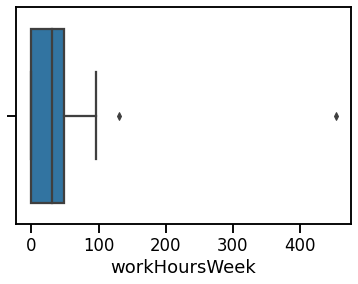

In [73]:

sns.boxplot(x=academic['workHoursWeek']) 

In [74]:
academic.sort_values(by = 'workHoursWeek', ascending = False)[:2]

,gender,age,civilStatus,childrens,district,health,closeFriends,work,workHoursWeek,familyMembers,...,universitySelectionReazon,minToTravel,weekStudyTime,failCourses,AsistancePercentage,midterExam,finalExam,practiceGrade,FinalGrade,StudentPerformance
31,0,25,1,0,0,0,7,1,453,3,...,1,45.0,24.0,16,100,17,16,16.0,16.333333,2
132,0,25,1,0,2,0,0,1,130,5,...,3,120.0,64.0,0,100,13,12,13.0,12.666667,1


<AxesSubplot:xlabel='closeFriends'>

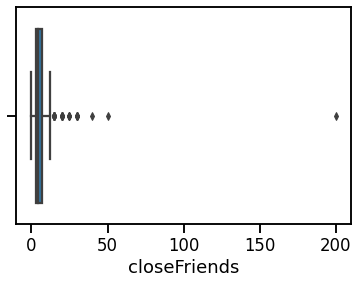

In [75]:

sns.boxplot(x=academic['closeFriends']) 

In [76]:
academic.sort_values(by = 'closeFriends', ascending = False)[:2]

,gender,age,civilStatus,childrens,district,health,closeFriends,work,workHoursWeek,familyMembers,...,universitySelectionReazon,minToTravel,weekStudyTime,failCourses,AsistancePercentage,midterExam,finalExam,practiceGrade,FinalGrade,StudentPerformance
38,0,42,0,2,1,0,200,1,48,4,...,3,60.0,4.0,1,14,14,14,14.0,14.0,2
256,0,24,1,0,2,0,50,1,40,4,...,3,70.0,2.0,0,85,11,12,13.0,12.0,1


In [77]:
academic.drop(academic.index[[3,31,38,132,143,200,225,256,310,323]],inplace=True) 

<AxesSubplot:xlabel='weekStudyTime'>

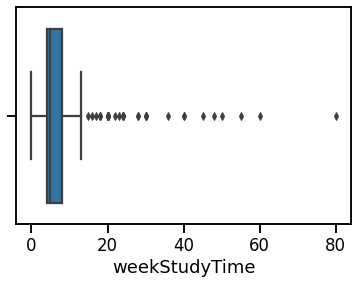

In [78]:
sns.boxplot(x=academic['weekStudyTime'])

<AxesSubplot:xlabel='minToTravel'>

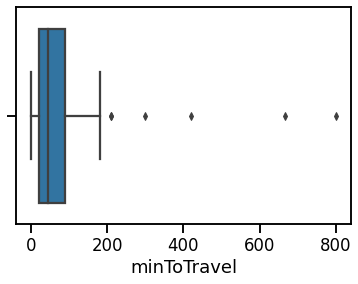

In [79]:
sns.boxplot(x=academic['minToTravel'])

<AxesSubplot:xlabel='familyMembers'>

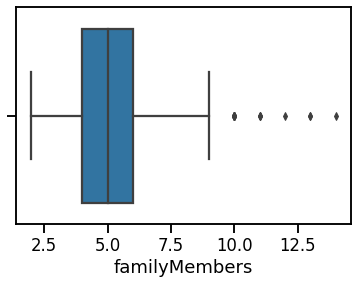

In [80]:
sns.boxplot(x=academic['familyMembers']) 

<AxesSubplot:xlabel='workHoursWeek'>

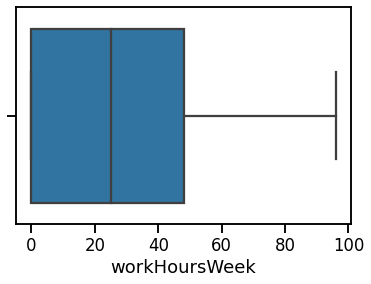

In [81]:
sns.boxplot(x=academic['workHoursWeek']) 

<AxesSubplot:xlabel='closeFriends'>

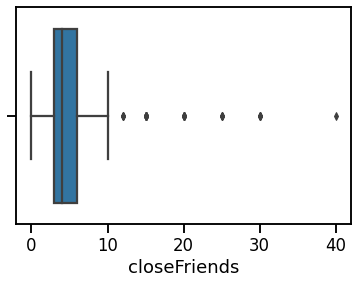

In [82]:
sns.boxplot(x=academic['closeFriends']) 

Guardamos el archivo procesado con los datos ya convertidos a numericos para poder procesarlos

In [83]:
outputfile = 'studentPerformanceProcesed.csv'
academic.to_csv(outputfile, index=False)


In [84]:
academic.head(5)

,gender,age,civilStatus,childrens,district,health,closeFriends,work,workHoursWeek,familyMembers,...,universitySelectionReazon,minToTravel,weekStudyTime,failCourses,AsistancePercentage,midterExam,finalExam,practiceGrade,FinalGrade,StudentPerformance
0,0,19,1,0,2,2,3,0,4,3,...,1,15.0,2.0,1,90,14,12,13.0,13.000000,1
1,0,22,1,0,2,0,2,0,0,3,...,3,30.0,8.0,0,100,16,17,16.0,16.333333,2
2,1,24,1,0,0,1,5,1,48,4,...,3,45.0,0.0,0,80,15,15,16.0,15.333333,2
4,0,20,1,0,2,0,4,1,25,5,...,3,50.0,5.0,2,100,14,14,14.0,14.000000,2
5,0,21,0,1,2,0,2,1,40,5,...,1,40.0,4.0,4,70,17,17,17.0,17.000000,2


# Make the data normaly distributied and scaled

In [85]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

academic.drop('StudentPerformance', inplace=True, axis=1)
# The custom NumPy log transformer
log_transformer = FunctionTransformer(np.log1p)

# The pipeline
estimators = [('log1p', log_transformer), ('minmaxscale', MinMaxScaler())]
pipeline = Pipeline(estimators)

# Convert the original data
data_pipe = pipeline.fit_transform(academic)

In [86]:
data_pipe=pd.DataFrame(data_pipe)

In [87]:
data_pipe.head(5)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.087511,1.0,0.0,0.792481,1.00000,0.373305,0.0,0.351812,0.178747,...,0.369070,0.5,0.346995,0.250000,0.182088,0.952977,0.693730,0.433997,0.579864,0.428236
1,0.0,0.203595,1.0,0.0,0.792481,0.00000,0.295837,0.0,0.000000,0.178747,...,0.630930,1.0,0.457362,0.500000,0.000000,1.000000,0.807658,0.818068,0.781045,0.729406
2,1.0,0.272850,1.0,0.0,0.000000,0.63093,0.482489,1.0,0.850725,0.317394,...,1.000000,1.0,0.523218,0.000000,0.000000,0.900474,0.752475,0.679058,0.781045,0.645611
3,0.0,0.128035,1.0,0.0,0.792481,0.00000,0.433393,1.0,0.712197,0.430677,...,1.000000,1.0,0.540436,0.407732,0.288602,1.000000,0.693730,0.602888,0.651353,0.525526
4,0.0,0.166674,0.0,0.5,0.792481,0.00000,0.295837,1.0,0.811761,0.430677,...,0.834044,0.5,0.504016,0.366243,0.422795,0.841044,0.859686,0.818068,0.840272,0.782625


In [88]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 7):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data_pipe)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': data_pipe.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.184316
2,PCA(n_components=2),0.316086
3,PCA(n_components=3),0.411887
4,PCA(n_components=4),0.496946
5,PCA(n_components=5),0.570675
6,PCA(n_components=6),0.635423


In [89]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
n,,,,,,,,,,,,,,,,,,,,,
1,0.053502,0.067452,0.093585,0.066095,0.033438,0.004157,0.007917,0.150362,0.116252,0.000894,...,0.003115,0.023867,0.007815,0.004005,0.001107,0.000596,0.009417,0.010101,0.003491,0.010289
2,0.042367,0.043896,0.074990,0.052330,0.019253,0.008125,0.010613,0.104912,0.076498,0.002880,...,0.004278,0.022475,0.004874,0.003979,0.005456,0.000662,0.006932,0.009706,0.004414,0.009334
3,0.038660,0.036457,0.120126,0.064215,0.024845,0.005321,0.008559,0.078362,0.050347,0.004841,...,0.026793,0.033238,0.013538,0.004858,0.014307,0.000782,0.013561,0.017204,0.009760,0.017956
4,0.036522,0.032134,0.108798,0.052077,0.030716,0.034143,0.006670,0.100541,0.067215,0.006351,...,0.024845,0.025416,0.013159,0.005946,0.011352,0.004349,0.011620,0.016205,0.009150,0.016328
5,0.037662,0.026336,0.100032,0.046209,0.031285,0.056449,0.007899,0.084062,0.057841,0.005473,...,0.025512,0.020928,0.012520,0.007203,0.012672,0.004183,0.012545,0.016978,0.009796,0.017450
6,0.060036,0.024488,0.089875,0.044051,0.033872,0.080758,0.010154,0.082658,0.054838,0.004792,...,0.021912,0.025507,0.011035,0.006460,0.013015,0.004685,0.011563,0.014365,0.008961,0.015564


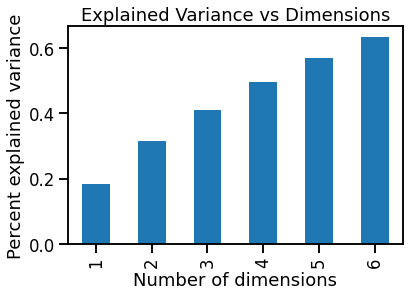

In [90]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

In [91]:
pdcainst=PCA(n_components=6)
data_pipe=pdcainst.fit_transform(data_pipe)

In [92]:
data_pipe=pd.DataFrame(data_pipe)
data_pipe

,0,1,2,3,4,5
0,1.192040,0.599418,0.148516,-0.178604,0.405403,0.295390
1,0.765784,-0.292832,0.076036,-0.306550,-0.871167,-0.135284
2,0.701899,0.857738,0.090650,0.895609,0.286835,0.706585
3,0.203759,0.486921,-0.095212,0.559641,-0.588835,-0.006966
4,-0.213727,0.614576,0.947433,0.340422,-0.369882,-0.083660
...,...,...,...,...,...,...
312,-0.566917,-0.577522,0.876268,0.056116,0.566467,0.403134
313,-0.227108,-0.801445,-0.014853,0.579246,-0.292028,0.050064
314,0.165479,0.157236,-0.073768,0.858449,-0.075358,0.010893
315,-0.104678,-0.803836,-0.033946,0.563613,-0.345274,0.058535


In [93]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [97]:
from sklearn.cluster import KMeans

num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(data_pipe)
data_pipe['kmeans'] = km.predict(data_pipe)

In [98]:
data_pipe

,0,1,2,3,4,5,kmeans
0,1.192040,0.599418,0.148516,-0.178604,0.405403,0.295390,3
1,0.765784,-0.292832,0.076036,-0.306550,-0.871167,-0.135284,3
2,0.701899,0.857738,0.090650,0.895609,0.286835,0.706585,1
3,0.203759,0.486921,-0.095212,0.559641,-0.588835,-0.006966,1
4,-0.213727,0.614576,0.947433,0.340422,-0.369882,-0.083660,0
...,...,...,...,...,...,...,...
312,-0.566917,-0.577522,0.876268,0.056116,0.566467,0.403134,0
313,-0.227108,-0.801445,-0.014853,0.579246,-0.292028,0.050064,2
314,0.165479,0.157236,-0.073768,0.858449,-0.075358,0.010893,1
315,-0.104678,-0.803836,-0.033946,0.563613,-0.345274,0.058535,2


In [101]:
# Comparing with KMeans results:
(data_pipe
 .groupby(['kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

,number
kmeans,
0,71
1,61
2,87
3,98
